In [62]:

import pandas as pd
from sklearn.linear_model import LinearRegression

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib
# import seaborn as sn

from time import time

In [63]:
# Import Libs
import geopandas as gpd


# import the MSOA geojson

In [64]:
# 读取.geojson文件 —— 加载时间在6-7分钟
MSOA_gdf = gpd.read_file("/Users/victoriachen/Documents/My Baby Thesis/phase 2- spatial accessibility/centroid to lib/MSOA.geojson")

MSOA_gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [65]:
print(MSOA_gdf.head(2))


    MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0  E02000001        City of London 001  E09000001        City of London   
1  E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      7375      7187        188    25.5    4385   
1  E12000007  London      6775      6724         51    31.3    2713   

   AVHHOLDSZ                                           geometry  
0        1.6  MULTIPOLYGON (((531667.624 180534.992, 531647....  
1        2.5  MULTIPOLYGON (((548881.563 190845.265, 548881....  


In [80]:
print(MSOA_gdf.shape)


(983, 13)


# import the library csv

In [66]:
import pandas as pd


df = pd.read_csv('/Users/victoriachen/Documents/My Baby Thesis/phase 2- spatial accessibility/centroid to lib/for_nearest_library.csv')



In [67]:
# 创建地理坐标系的 GeoDataFrame
gdf_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf_geo = gdf_geo.set_crs(epsg=4326)

# 创建投影坐标系的 GeoDataFrame
gdf_proj = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.easting, df.northing))
gdf_proj = gdf_proj.set_crs(epsg=27700)

# 输出两个 GeoDataFrame 的 CRS 以验证
print(gdf_geo.crs)
print(gdf_proj.crs)

EPSG:4326
EPSG:27700


In [68]:
gdf_proj.head(2)

name   latitude  longitude      easting     northing  Column1  \
0  Thames View  51.527355   0.106155  546198.0775  183040.1829       20   
1      Barking  51.535810   0.081423  544455.8779  183931.2966       11   

                        geometry  
0  POINT (546198.078 183040.183)  
1  POINT (544455.878 183931.297)

In [69]:
libraries_gdf = gdf_proj.copy ()

# centroid (origin)

In [70]:
origins = MSOA_gdf.copy()

In [71]:
origins.head(2)

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0  E02000001        City of London 001  E09000001        City of London   
1  E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      7375      7187        188    25.5    4385   
1  E12000007  London      6775      6724         51    31.3    2713   

   AVHHOLDSZ                                           geometry  
0        1.6  MULTIPOLYGON (((531667.624 180534.992, 531647....  
1        2.5  MULTIPOLYGON (((548881.563 190845.265, 548881....

In [72]:
# 检查无效的几何图形
invalid_geometries = origins[~origins.is_valid]
print(invalid_geometries)

      MSOA11CD        MSOA11NM    LAD11CD     LAD11NM    RGN11CD RGN11NM  \
146  E02000151     Bromley 025  E09000006     Bromley  E12000007  London   
241  E02000248      Ealing 011  E09000009      Ealing  E12000007  London   
494  E02000514  Hillingdon 021  E09000017  Hillingdon  E12000007  London   
914  E02000947  Wandsworth 025  E09000032  Wandsworth  E12000007  London   

     USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
146      7574      7574          0    36.0    2994        2.5   
241      7334      7334          0    42.5    2902        2.5   
494      9820      9791         29    81.9    3044        3.2   
914      8675      8675          0   104.2    3820        2.3   

                                              geometry  
146  MULTIPOLYGON (((544615.566 168215.948, 544730....  
241  MULTIPOLYGON (((518327.56 181841.56, 518327.08...  
494  MULTIPOLYGON (((509782.352 181985.911, 509774....  
914  MULTIPOLYGON (((525084.997 173327.318, 525059....  


In [73]:
print(origins.shape)

(983, 13)


In [74]:
valid_geometries = origins[origins.is_valid]
print(valid_geometries.shape)

(979, 13)


In [75]:
origins.geometry = origins.geometry.centroid

In [76]:
origins.head(2)

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0  E02000001        City of London 001  E09000001        City of London   
1  E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      7375      7187        188    25.5    4385   
1  E12000007  London      6775      6724         51    31.3    2713   

   AVHHOLDSZ                       geometry  
0        1.6   POINT (532482.704 181269.31)  
1        2.5  POINT (548312.915 189881.379)

In [77]:
print (origins.shape)

(983, 13)


In [78]:
import numpy as np
from shapely.geometry import Point

# 检查geometry是否包含无穷大值
def has_infinity(geom):
    if isinstance(geom, Point):
        return np.isinf(geom.x) or np.isinf(geom.y)
    return False

infinity_geometries = origins[origins['geometry'].apply(has_infinity)]
print(infinity_geometries)

Empty GeoDataFrame
Columns: [MSOA11CD, MSOA11NM, LAD11CD, LAD11NM, RGN11CD, RGN11NM, USUALRES, HHOLDRES, COMESTRES, POPDEN, HHOLDS, AVHHOLDSZ, geometry]
Index: []


In [79]:
origins[['MSOA11CD', 'MSOA11NM', 'geometry']].to_csv('/Users/victoriachen/Documents/My Baby Thesis/phase 2- spatial accessibility/centroid to lib/centroid_data.csv', index=False)


# Fulvio Method

In [42]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point
from scipy.spatial import cKDTree

print(shapely.__version__)
# print(scipy.__version__)

2.0.5


In [43]:
gdf_proj.index.max()

367

In [44]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# 确保所有数据使用相同的坐标参考系统 (CRS)
print("MSOA CRS:", origins.crs)
print("Libraries CRS:", libraries_gdf.crs)

# 确保坐标参考系都是EPSG:27700
assert origins.crs == libraries_gdf.crs == "EPSG:27700"

# 提取 LSOA 中心点的坐标
MSOA_coords = [(geom.x, geom.y) for geom in origins.geometry]
print("MSOA Coordinates:", MSOA_coords[:5])  # 打印前5个 LSOA 坐标进行检查



MSOA CRS: EPSG:27700
Libraries CRS: EPSG:27700
MSOA Coordinates: [(532482.7039767915, 181269.3100176065), (548312.914587414, 189881.3785874949), (548454.9249279731, 188400.1498846446), (551008.9717450518, 186310.93443301003), (548667.0893255679, 186903.34361035156)]


In [45]:
# 提取图书馆的坐标
library_coords = [(geom.x, geom.y) for geom in libraries_gdf.geometry]
print("Library Coordinates:", library_coords[:5])  # 打印前5个图书馆坐标进行检查

# 使用 cKDTree 进行最近邻分析
tree = cKDTree(library_coords)
distances, indices = tree.query(MSOA_coords, k=1)

print("Distances:", distances[:5])  # 打印前5个距离进行检查
print("Indices:", indices[:5])      # 打印前5个索引进行检查

# 检查库的索引和数据类型
print("Library DataFrame Index:", libraries_gdf.index)

# 将结果加入 LSOA GeoDataFrame
origins['Nearest_Library_ID'] = libraries_gdf.iloc[indices].index.values
origins['Distance_to_Library'] = distances

# 输出结果
print(origins[['MSOA11CD', 'Nearest_Library_ID', 'Distance_to_Library']].head())

# 创建一个新的 GeoDataFrame 用于存储 LSOA 中心点到最近图书馆的连线
lines = []

for i, row in origins.iterrows():
    MSOA_point = row.geometry
    library_index = row['Nearest_Library_ID']
    library_point = libraries_gdf.loc[library_index].geometry
    line = LineString([MSOA_point, library_point])
    lines.append(line)

lines_gdf = gpd.GeoDataFrame(geometry=lines, crs="EPSG:27700")



Library Coordinates: [(546198.0775, 183040.1829), (544455.8779, 183931.2966), (549203.432, 184520.334), (548132.3554, 186514.5713), (548721.4527, 188095.717)]
Distances: [ 101.65940416  399.09008969  404.61887563 1659.68954563  661.12349864]
Indices: [ 71   5   4 164   3]
Library DataFrame Index: RangeIndex(start=0, stop=368, step=1)
    MSOA11CD  Nearest_Library_ID  Distance_to_Library
0  E02000001                  71           101.659404
1  E02000002                   5           399.090090
2  E02000003                   4           404.618876
3  E02000004                 164          1659.689546
4  E02000005                   3           661.123499


In [56]:
origins[['MSOA11CD', 'Nearest_Library_ID', 'Distance_to_Library']].to_csv('/Users/victoriachen/Documents/My Baby Thesis/phase 2- spatial accessibility/centroid to lib/CNL_output_data.csv', index=False)


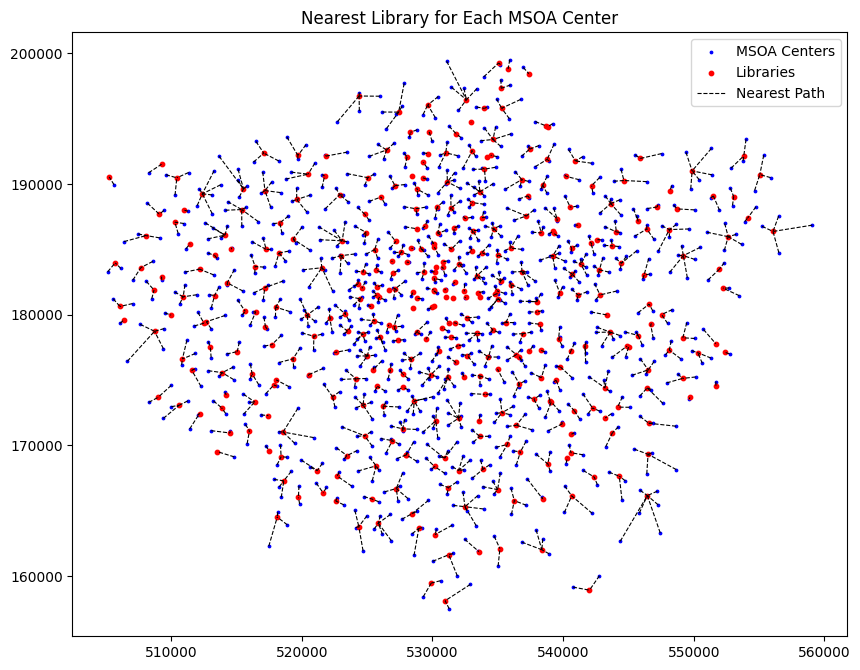

In [46]:
# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制 LSOA 中心点
origins.plot(ax=ax, color='blue', markersize=3, label='MSOA Centers')
# 绘制图书馆位置
libraries_gdf.plot(ax=ax, color='red', markersize=10, label='Libraries')
# 绘制连线
lines_gdf.plot(ax=ax, color='black', linewidth=0.8, linestyle='--', label='Nearest Path')
# 添加图例
plt.legend()
# 添加标题
plt.title('Nearest Library for Each MSOA Center')
# 显示地图
plt.show()

In [47]:
from shapely.geometry import MultiPolygon

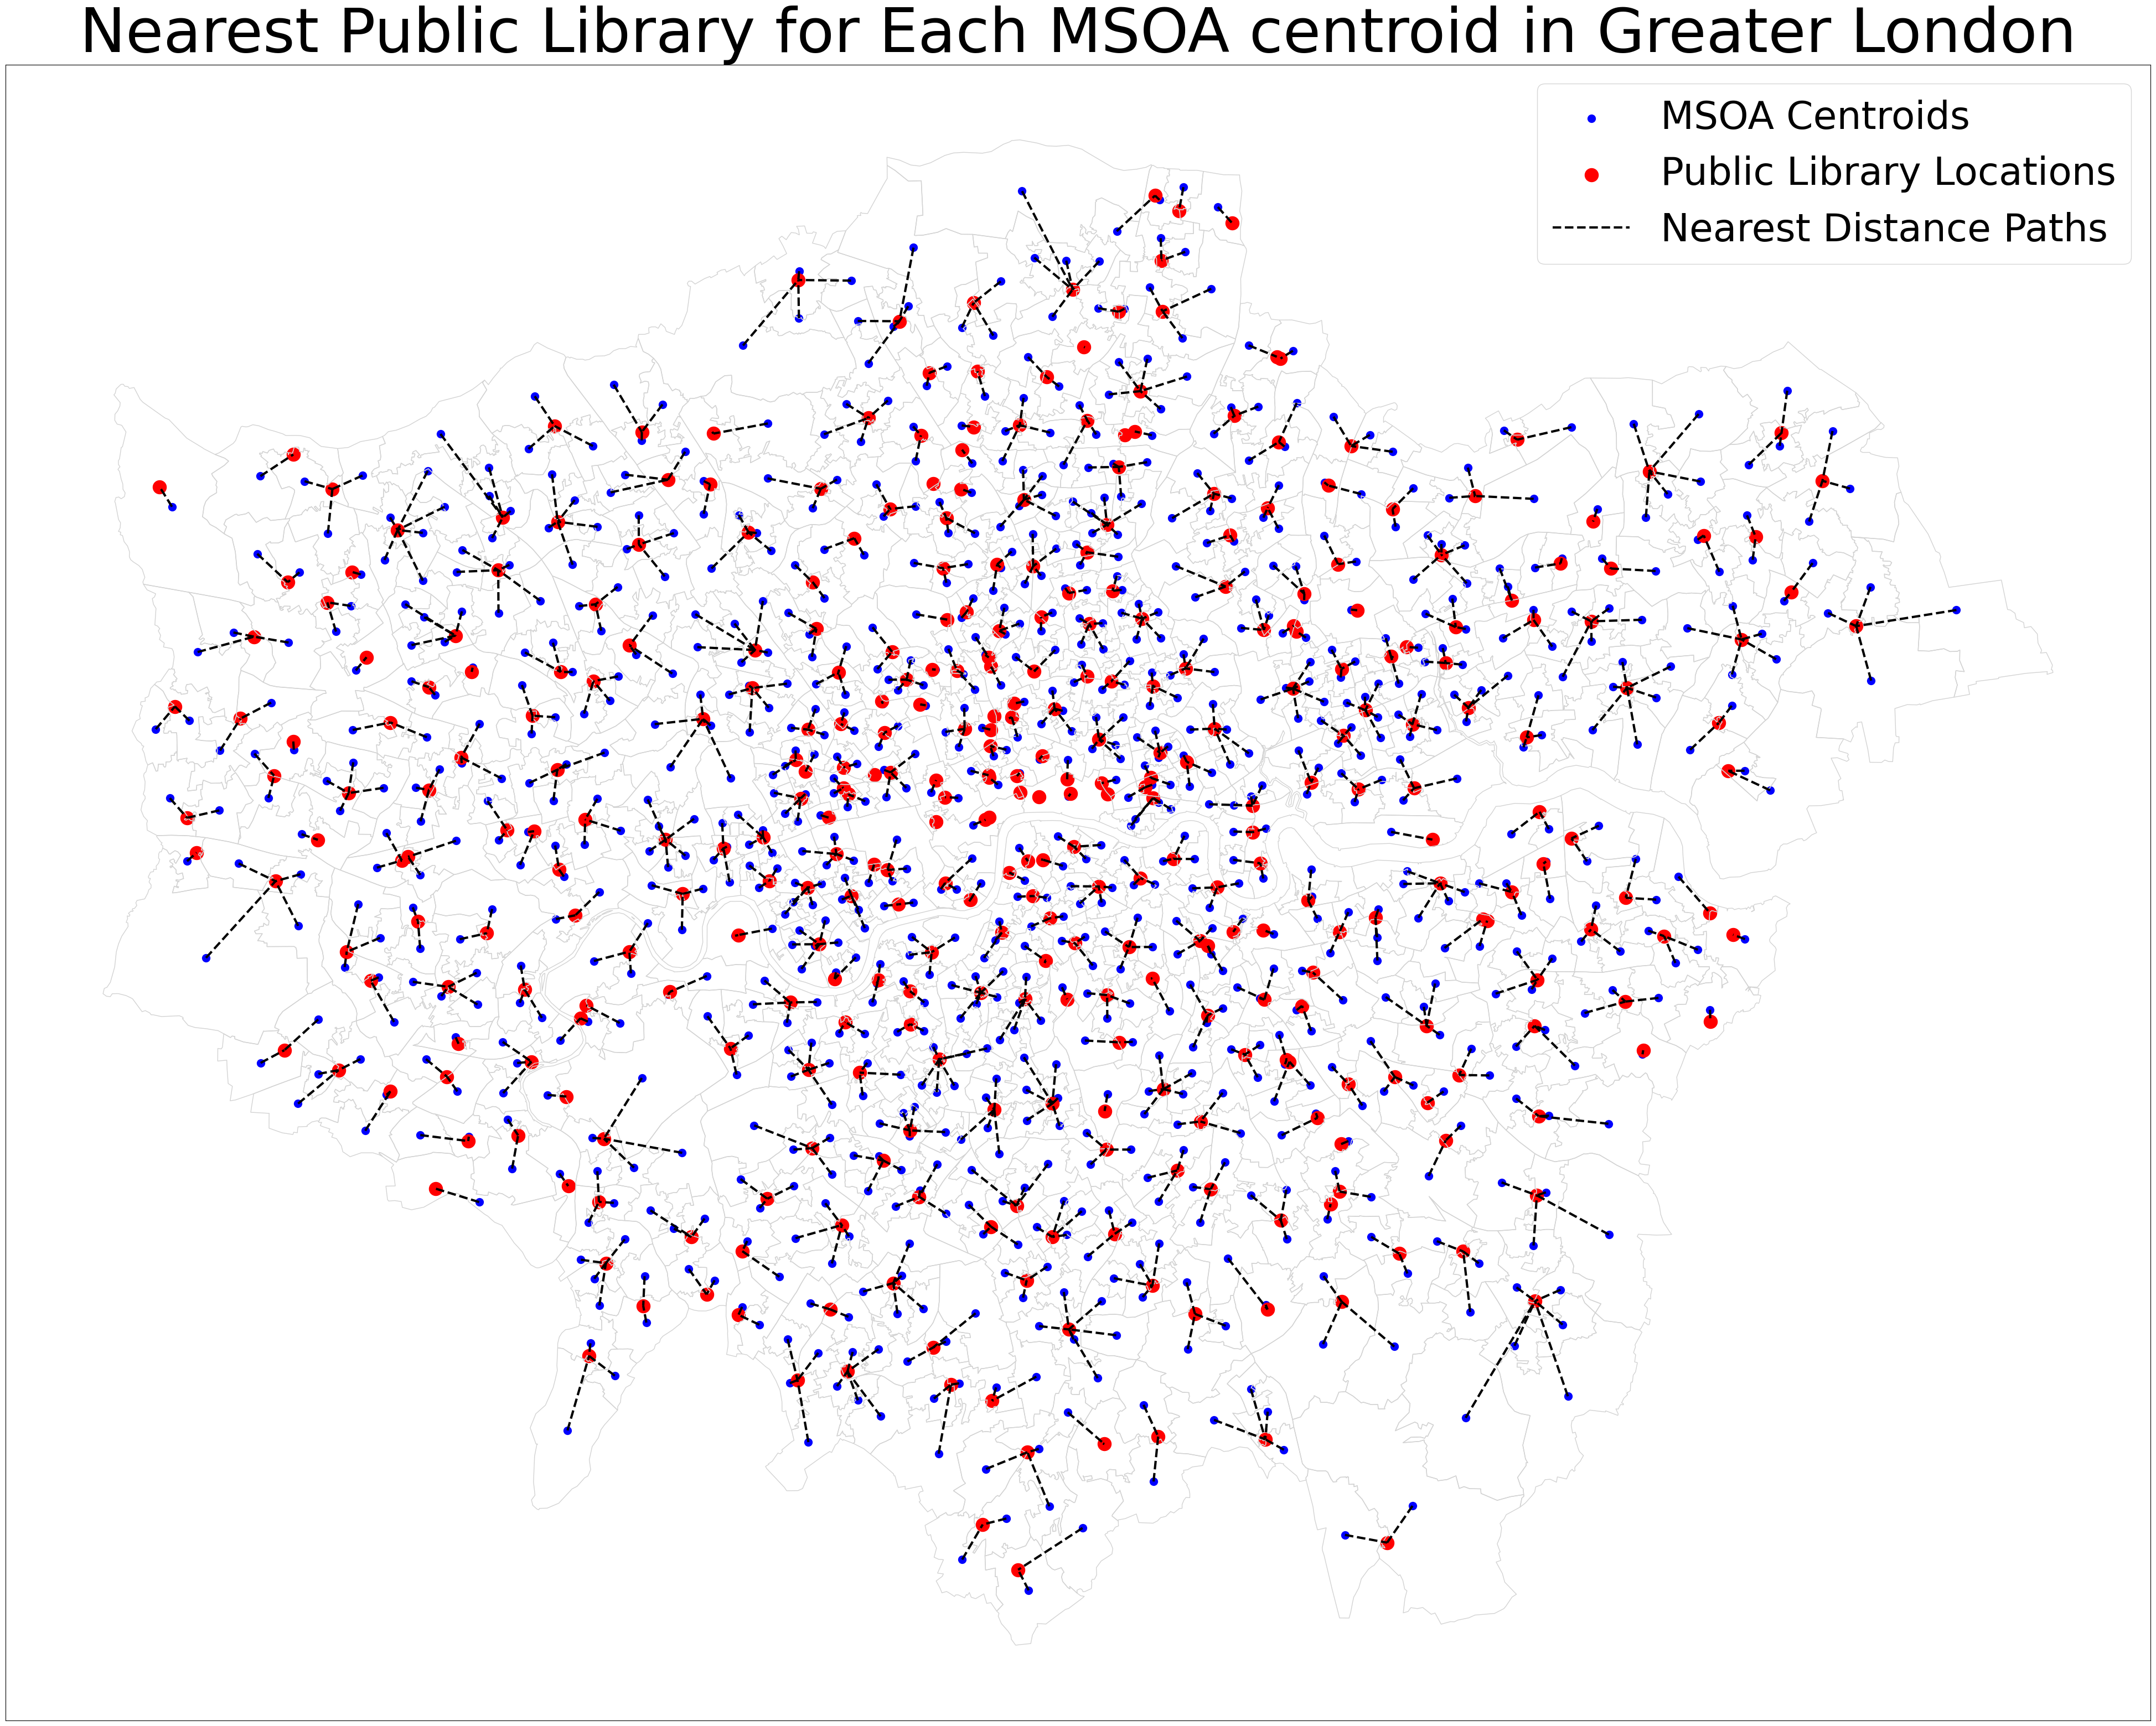

In [54]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPolygon

# Set the figure size
fig, ax = plt.subplots(figsize=(50, 50))

# Plot the London boundaries as a background
MSOA_gdf.boundary.plot(ax=ax, color='lightgray', linewidth=1)

# draw the boundaries
# outer_boundary = gpd.GeoSeries([MSOA_gdf.unary_union])
# outer_boundary.boundary.plot(ax=ax, color='black', linewidth=5)  

# Plot the LSOA centroids
origins.plot(ax=ax, color='blue', markersize=100, label='MSOA Centroids')

# Plot the public library locations
libraries_gdf.plot(ax=ax, color='red', markersize=300, label='Public Library Locations')

# Plot the nearest path connections
lines_gdf.plot(ax=ax, color='black', linewidth=3, linestyle='--', label='Nearest Distance Paths')

# Add a legend
plt.legend(fontsize=50)  # Set the font size of the legend here

# Add a title
plt.title('Nearest Public Library for Each MSOA centroid in Greater London', fontsize=80)

# Remove axis labels but keep the frame
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Keep the frame
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Display the map
plt.show()


/var/folders/8v/w5v659h53kx9q2bmq249f6hc0000gn/T/ipykernel_79759/3802837791.py:8: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  outer_boundary = gpd.GeoSeries([MSOA_gdf.unary_union])


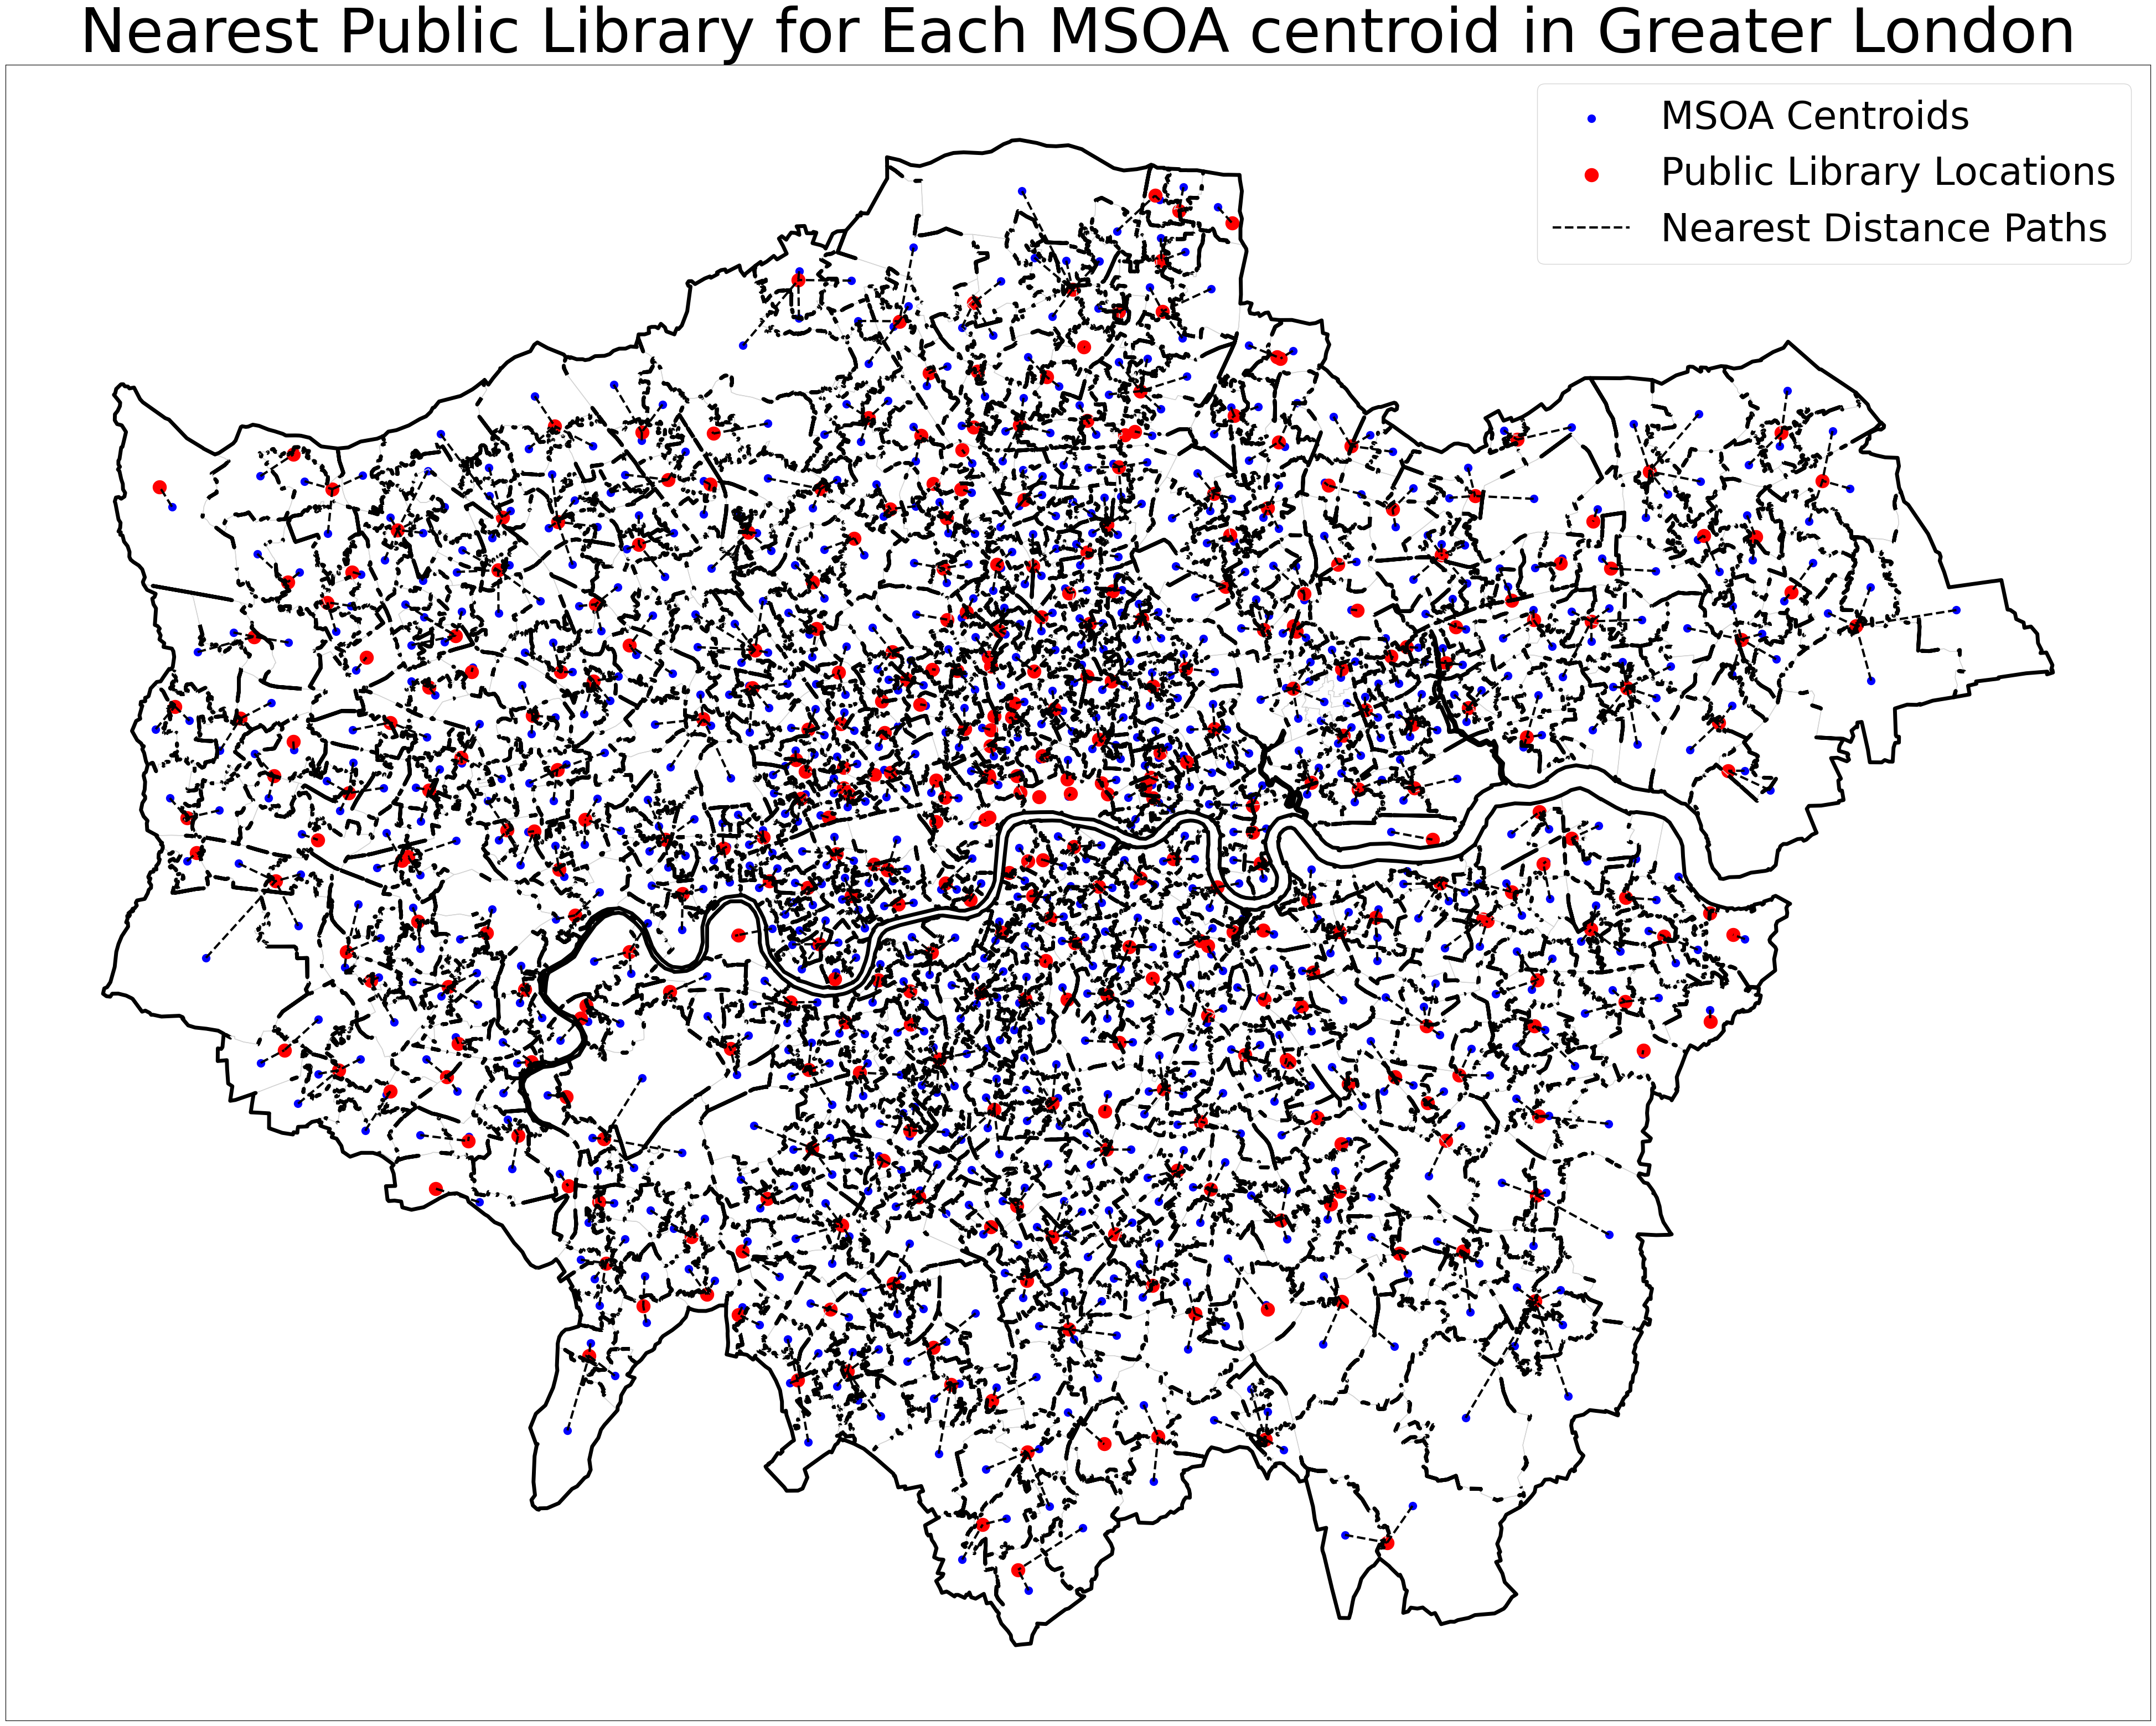

In [55]:
# Set the figure size
fig, ax = plt.subplots(figsize=(50, 50))

# Plot the London boundaries as a background
MSOA_gdf.boundary.plot(ax=ax, color='lightgray', linewidth=1)

# draw the boundaries
outer_boundary = gpd.GeoSeries([MSOA_gdf.unary_union])
outer_boundary.boundary.plot(ax=ax, color='black', linewidth=5)  

# Plot the LSOA centroids
origins.plot(ax=ax, color='blue', markersize=100, label='MSOA Centroids')

# Plot the public library locations
libraries_gdf.plot(ax=ax, color='red', markersize=300, label='Public Library Locations')

# Plot the nearest path connections
lines_gdf.plot(ax=ax, color='black', linewidth=3, linestyle='--', label='Nearest Distance Paths')

# Add a legend
plt.legend(fontsize=50)  # Set the font size of the legend here

# Add a title
plt.title('Nearest Public Library for Each MSOA centroid in Greater London', fontsize=80)

# Remove axis labels but keep the frame
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Keep the frame
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Display the map
plt.show()